In [1]:
### https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3

In [2]:
import matplotlib.pyplot as plt
from datetime import timedelta, date
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
covid_url = ("https://www.data.gouv.fr/fr/datasets/r/08c18e08-6780-452d-9b8c-ae244ad529b3")

In [4]:
STUDY_DAYS = 30

In [5]:
df = pd.read_csv(covid_url, sep=";", parse_dates=True, index_col=2)
df

,reg,cl_age90,hosp,rea,rad,dc
jour,,,,,,
2020-03-18,1,0,0,0,0,0
2020-03-18,1,9,0,0,0,0
2020-03-18,1,19,0,0,0,0
2020-03-18,1,29,0,0,0,0
2020-03-18,1,39,0,0,0,0
...,...,...,...,...,...,...
2021-02-17,94,59,4,0,88,5
2021-02-17,94,69,10,4,109,15
2021-02-17,94,79,11,3,131,37


In [6]:
df.cl_age90.unique()

array([ 0,  9, 19, 29, 39, 49, 59, 69, 79, 89, 90], dtype=int64)

In [7]:
df.reg.unique().shape

(18,)

In [8]:
df.loc[(df.cl_age90 < 70),  'AgeGroup'] = 'Midlle age'
df.loc[(df.cl_age90 < 40),  'AgeGroup'] = 'Adult'
df.loc[(df.cl_age90 < 20),  'AgeGroup'] = 'Teen'
df.loc[(df.cl_age90 < 10),  'AgeGroup'] = 'Kid'
df.loc[(df.cl_age90 <= 1),  'AgeGroup'] = 'Infant'
df.loc[(df.cl_age90 > 68),  'AgeGroup'] = 'Elderly'
df

,reg,cl_age90,hosp,rea,rad,dc,AgeGroup
jour,,,,,,,
2020-03-18,1,0,0,0,0,0,Infant
2020-03-18,1,9,0,0,0,0,Kid
2020-03-18,1,19,0,0,0,0,Teen
2020-03-18,1,29,0,0,0,0,Adult
2020-03-18,1,39,0,0,0,0,Adult
...,...,...,...,...,...,...,...
2021-02-17,94,59,4,0,88,5,Midlle age
2021-02-17,94,69,10,4,109,15,Elderly
2021-02-17,94,79,11,3,131,37,Elderly


In [9]:
df.AgeGroup.unique()

array(['Infant', 'Kid', 'Teen', 'Adult', 'Midlle age', 'Elderly'],
      dtype=object)

In [10]:
df.drop(columns=["cl_age90"], inplace=True)
df.drop(columns=["reg"], inplace=True)
df

,hosp,rea,rad,dc,AgeGroup
jour,,,,,
2020-03-18,0,0,0,0,Infant
2020-03-18,0,0,0,0,Kid
2020-03-18,0,0,0,0,Teen
2020-03-18,0,0,0,0,Adult
2020-03-18,0,0,0,0,Adult
...,...,...,...,...,...
2021-02-17,4,0,88,5,Midlle age
2021-02-17,10,4,109,15,Elderly
2021-02-17,11,3,131,37,Elderly


In [11]:
last_day = df.tail(1).index[0]
before_day = last_day - timedelta(days = STUDY_DAYS)
print("Evolution from ", before_day, " to ", last_day)

sdf = df.loc[last_day]
pdf = df.loc[before_day]
sdf.reset_index(inplace=True)
pdf.reset_index(inplace=True)

sdf, pdf

Evolution from  2021-01-18 00:00:00  to  2021-02-17 00:00:00


(          jour  hosp  rea  rad   dc    AgeGroup
 0   2021-02-17    31    5  826  175      Infant
 1   2021-02-17     0    0   21    0         Kid
 2   2021-02-17     0    0    9    0        Teen
 3   2021-02-17     0    0   20    0       Adult
 4   2021-02-17     0    0   61    2       Adult
 ..         ...   ...  ...  ...  ...         ...
 193 2021-02-17     4    0   88    5  Midlle age
 194 2021-02-17    10    4  109   15     Elderly
 195 2021-02-17    11    3  131   37     Elderly
 196 2021-02-17    14    1  118   55     Elderly
 197 2021-02-17     7    1   43   26     Elderly
 
 [198 rows x 6 columns],
           jour  hosp  rea  rad   dc    AgeGroup
 0   2021-01-18    54    5  776  169      Infant
 1   2021-01-18     0    0   21    0         Kid
 2   2021-01-18     0    0    9    0        Teen
 3   2021-01-18     0    0   20    0       Adult
 4   2021-01-18     0    0   59    2       Adult
 ..         ...   ...  ...  ...  ...         ...
 193 2021-01-18     1    0   84    5  Midl

In [12]:
sdf = sdf.groupby(['AgeGroup']).sum()
sdf

,hosp,rea,rad,dc
AgeGroup,,,,
Adult,645,108,20306,217
Elderly,22218,2516,169781,55826
Infant,25929,3340,245706,58862
Kid,34,4,2146,4
Midlle age,2780,680,49165,2485
Teen,59,4,2298,7


In [13]:
pdf = pdf.groupby(['AgeGroup']).sum()
pdf

,hosp,rea,rad,dc
AgeGroup,,,,
Adult,582,70,18084,194
Elderly,22315,2208,143163,46656
Infant,25584,2803,210169,49301
Kid,28,4,1976,4
Midlle age,2381,489,43300,2169
Teen,69,7,2017,6


In [14]:
sdf.index.values

array(['Adult', 'Elderly', 'Infant', 'Kid', 'Midlle age', 'Teen'],
      dtype=object)

In [15]:
frame = {"prev_hosp": pdf["hosp"], "lastest_hosp": sdf["hosp"]}
frame

{'prev_hosp': AgeGroup
 Adult           582
 Elderly       22315
 Infant        25584
 Kid              28
 Midlle age     2381
 Teen             69
 Name: hosp, dtype: int64,
 'lastest_hosp': AgeGroup
 Adult           645
 Elderly       22218
 Infant        25929
 Kid              34
 Midlle age     2780
 Teen             59
 Name: hosp, dtype: int64}

In [16]:
stats = pd.DataFrame(frame)
stats

,prev_hosp,lastest_hosp
AgeGroup,,
Adult,582,645
Elderly,22315,22218
Infant,25584,25929
Kid,28,34
Midlle age,2381,2780
Teen,69,59


In [17]:
x = np.arange(len(stats.index))  
width = 0.35
x

array([0, 1, 2, 3, 4, 5])

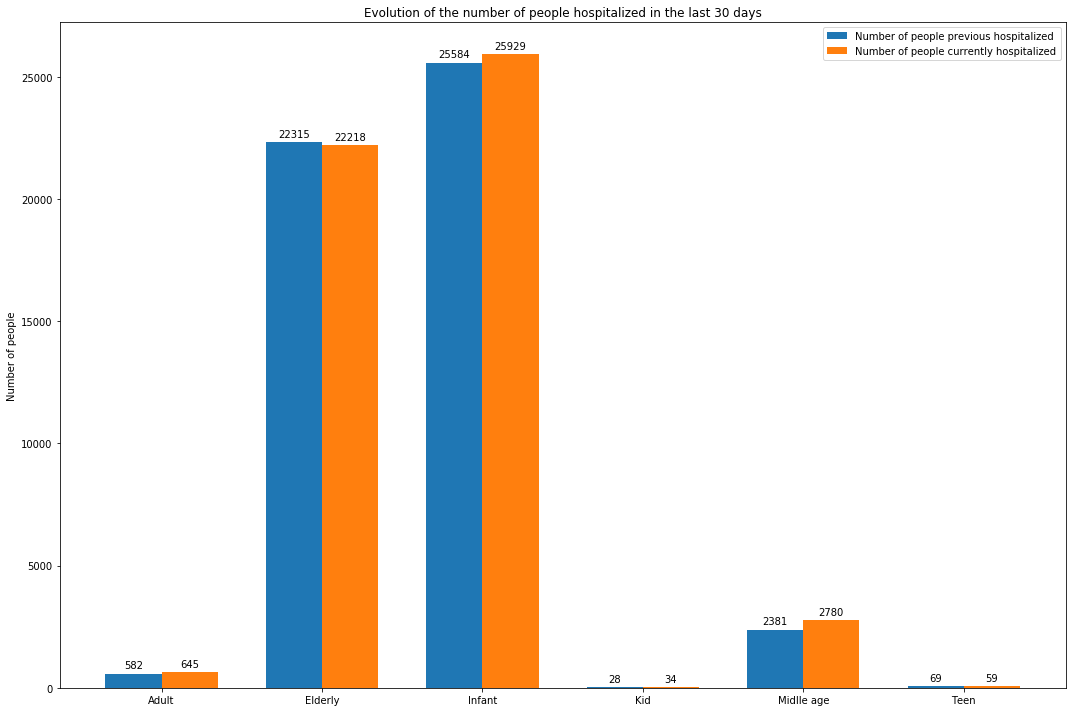

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
rects1 = ax.bar(x - width/2, stats.prev_hosp, width, label='Number of people previous hospitalized')
rects2 = ax.bar(x + width/2, stats.lastest_hosp, width, label='Number of people currently hospitalized')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of people')
ax.set_title('Evolution of the number of people hospitalized in the last 30 days')
#ax.set_xticks(stats.index)
# ax.set_xticklabels(stats.index)
ax.set_xticklabels(('', 'Adult', 'Elderly', 'Infant', 'Kid', 'Midlle age', 'Teen'))
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
fig.savefig('EvolutionHospitalizationsAge.png')
plt.show()